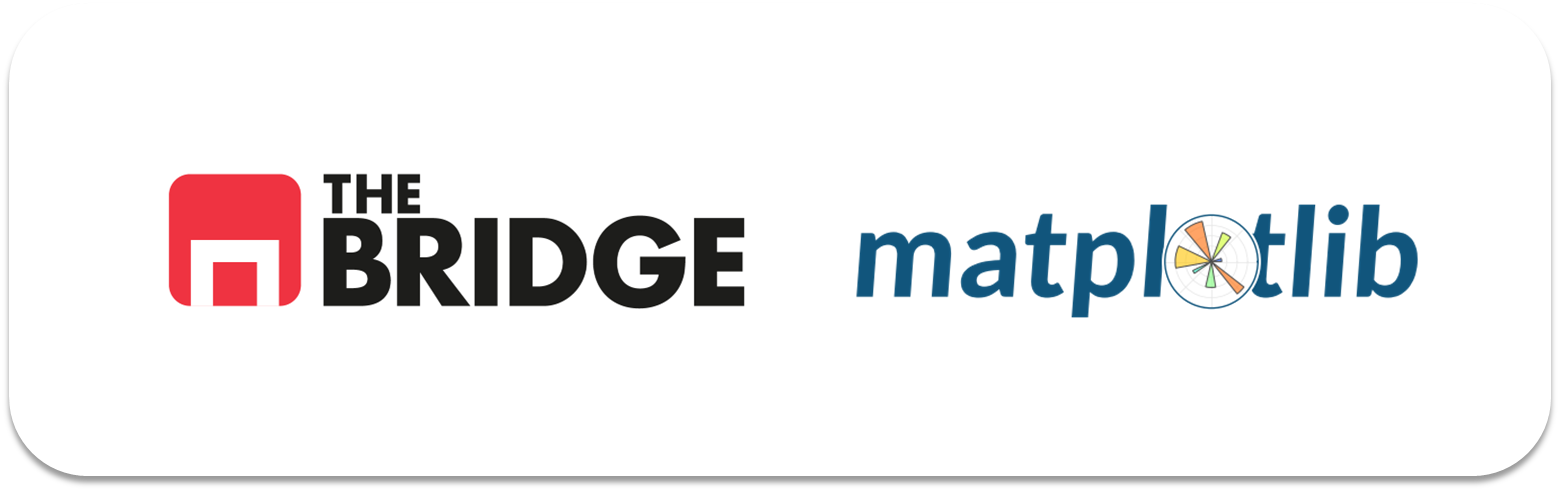

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [178]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [179]:
df_cities = pd.read_csv("./data/california_cities.csv")
df_cities.head(7)

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57


In [180]:
df_cities.info()   # vemos que varias columnas contienen valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [181]:
df_cities.describe()

,Unnamed: 0,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
count,482.000000,482.000000,482.000000,434.000000,470.000000,4.820000e+02,480.000000,482.000000,481.000000,477.000000,478.000000,478.000000,477.000000
mean,240.500000,36.095088,-119.837714,180.416705,567.168723,6.489493e+04,18.442183,16.840981,1.589630,46.753283,43.547021,3.125178,5.301801
std,139.285678,2.298006,2.147676,309.531825,1001.265722,2.032041e+05,36.363230,32.694647,9.490386,90.972269,84.933022,11.562269,14.656428
min,0.000000,32.578333,-124.263333,-34.000000,-180.000000,1.000000e+00,0.314000,0.314000,0.000000,0.813000,0.813000,0.000000,0.000000
25%,120.250000,33.977292,-121.954931,22.000000,69.000000,1.090200e+04,3.708250,3.506500,0.000000,9.551000,9.025000,0.000250,0.000000
50%,240.500000,36.204722,-119.708611,67.000000,200.000000,2.905750e+04,9.093000,8.362000,0.029000,23.551000,21.533000,0.078500,0.340000
75%,360.750000,37.886667,-117.977292,173.500000,515.000000,6.646650e+04,19.878250,19.090000,0.244000,51.772000,49.322000,0.623250,1.870000
max,481.000000,41.965000,-114.596389,2402.000000,7880.000000,3.884307e+06,503.000000,469.000000,185.020000,1302.000000,1214.000000,122.270000,84.580000


In [182]:
cities = df_cities.copy()   # guardamos una copia antes de modificar el dataframe
df_cities.dropna(axis= "index", inplace=True)  # así nos cargamos todas las filas que contengan un nulo

df_cities.info()    # hemos pasado de 482 a 427 filas y hemos eliminado los nulos

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

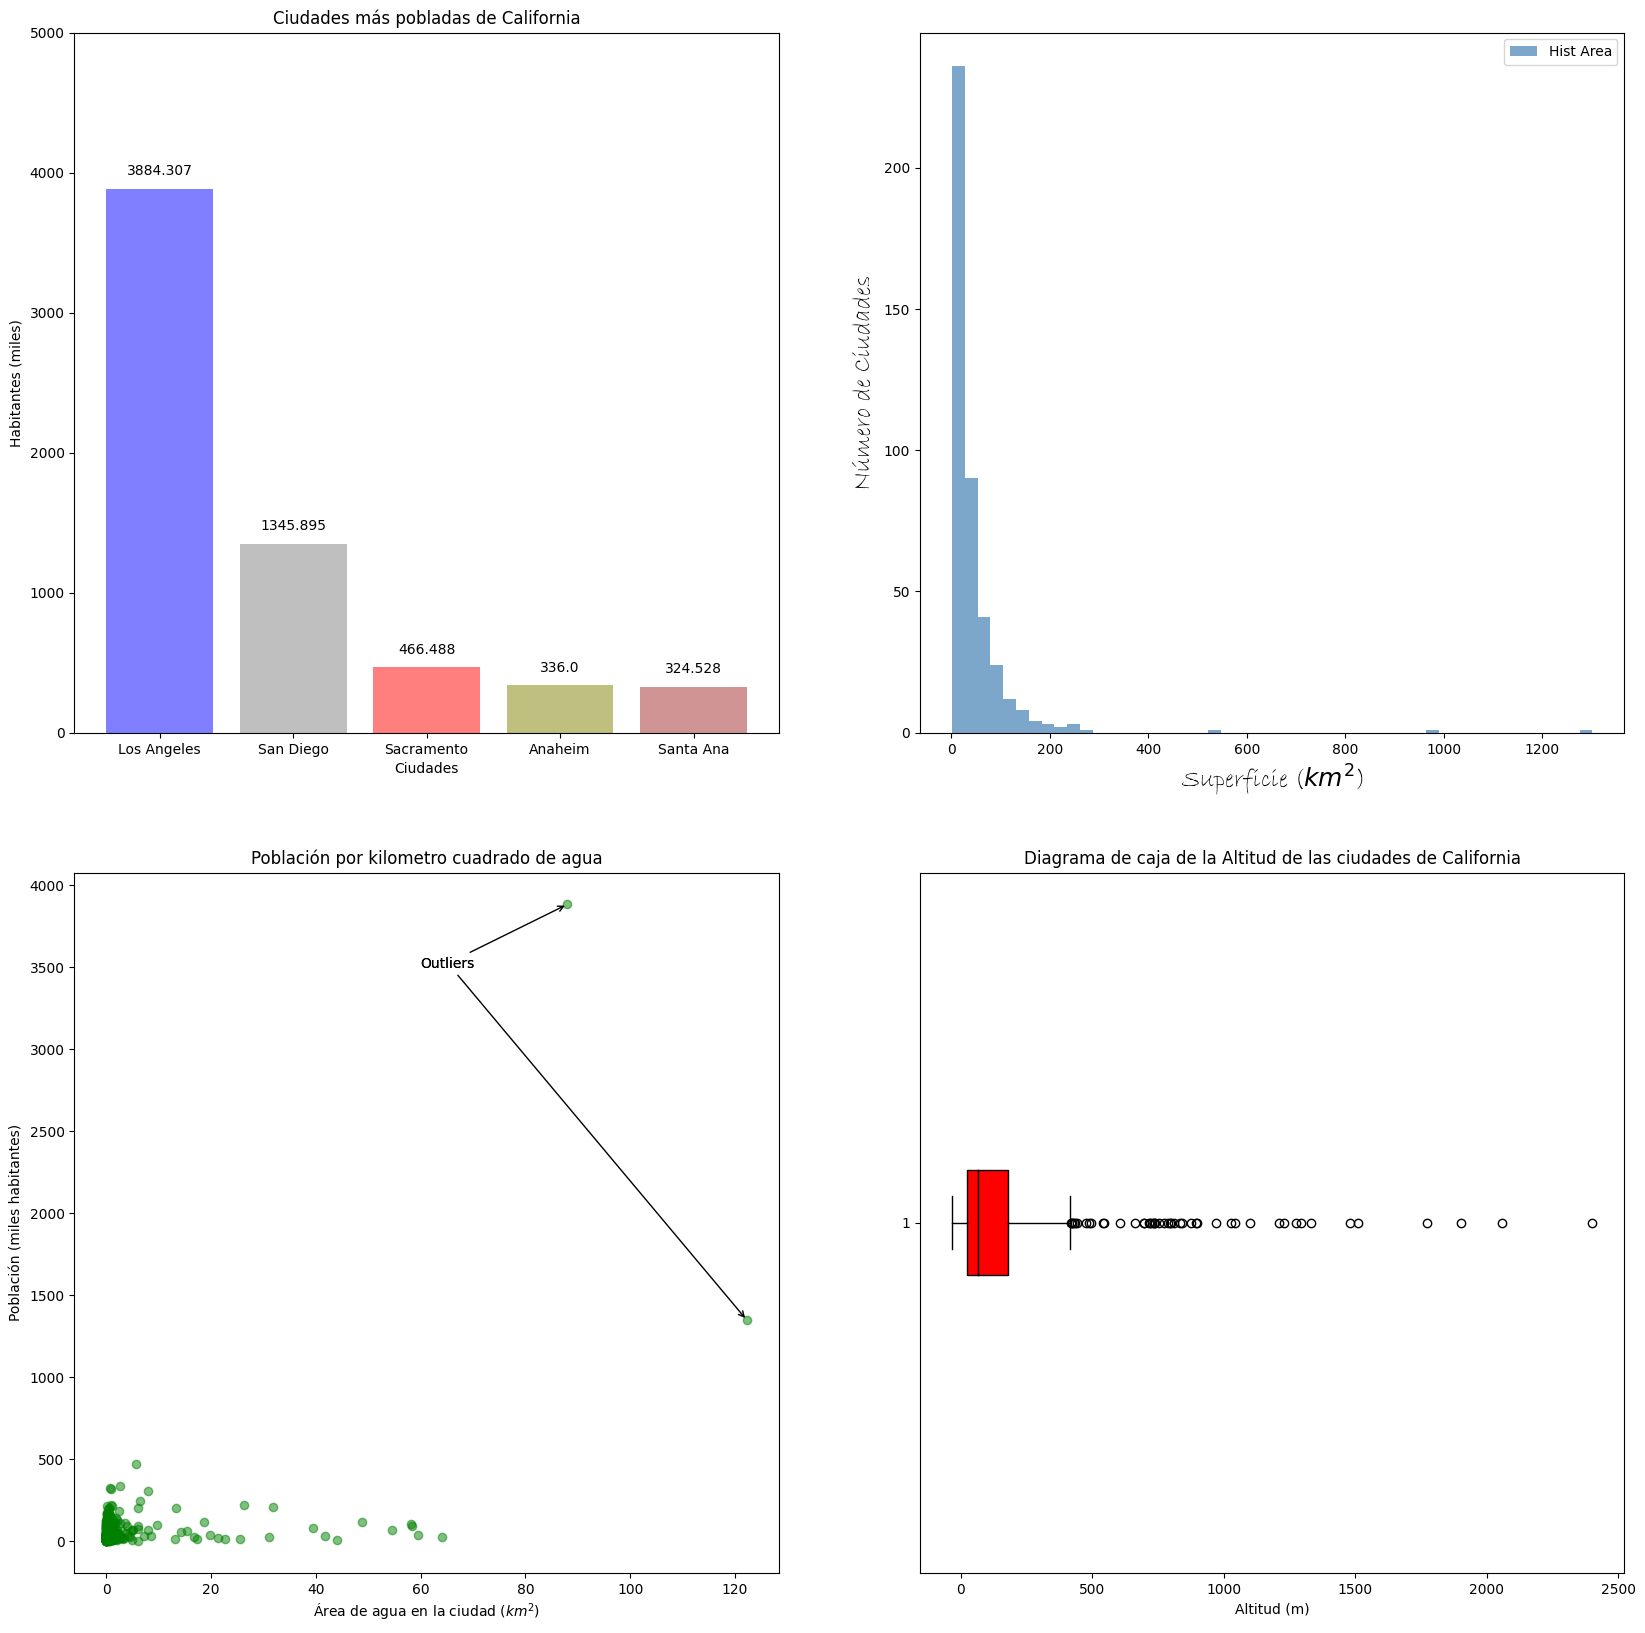

    1. Las ciudades más pobladas, con los números de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)


In [183]:
df_cities.sort_values("population_total", ascending=False, inplace=True)  # Ordenamos el dataframe por el total de la población de las ciudades de mayor a menor

df_top_5 = df_cities.iloc[0:5,:]   # Nos quedamos con las 5 más pobladas mediante slicing
df_top_5

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
239,239,LosAngeles,34.050000,-118.250000,71.0,2.0,3884307,503.000,469.000,34.000,1302.000,1214.000,88.000,6.70
367,367,SanDiego,32.715000,-117.162500,6.0,3.0,1345895,372.400,325.190,47.210,964.510,842.230,122.270,12.68
359,359,Sacramento,38.555556,-121.468889,9.0,30.0,466488,100.105,97.915,2.190,259.273,253.600,5.673,2.19
9,9,Anaheim,33.836111,-117.889722,48.0,157.0,336000,50.811,49.835,0.976,131.600,129.073,2.527,1.92
386,386,SantaAna,33.740833,-117.881389,35.0,115.0,324528,27.518,27.270,0.248,71.271,70.628,0.643,0.90


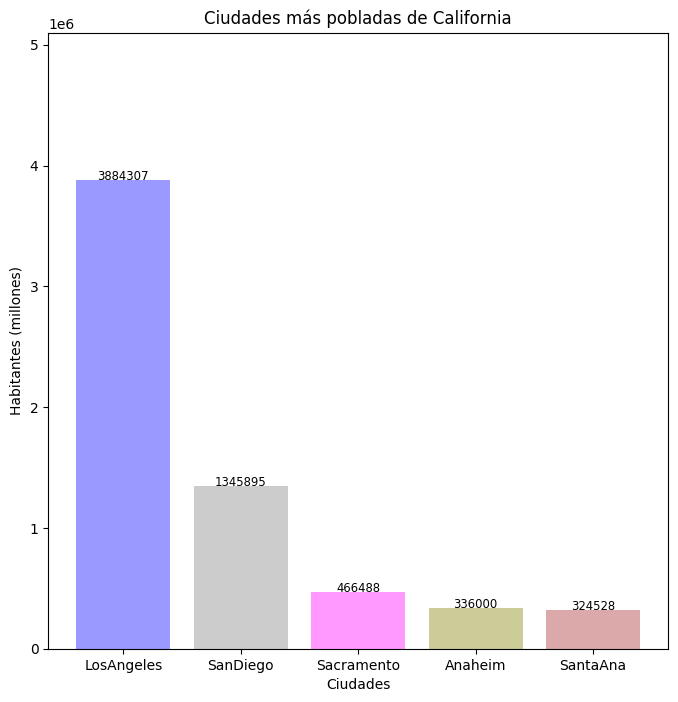

In [184]:
categorias = df_top_5.city.value_counts().index.to_list()           # Pasamos a una lista la posición de aparición de frecuencias asociadas a las ciudades
frecuencia = df_top_5["population_total"].to_list()                 # Lista de valores absolutos de población


fig, ax= plt.subplots(figsize= (8,8))    # Al no proporcionarle dimensiones, nos devuelve una sola axes
ax.bar(categorias, frecuencia ,color = ["blue","gray","magenta","olive","brown"], alpha= 0.4)
ax.set_ylim(0,51e5)
ax.set_title("Ciudades más pobladas de California")
ax.set_xlabel("Ciudades")
ax.set_ylabel("Habitantes (millones)")  

for i in range (5):
    ax.text(categorias[i],frecuencia[i],f"{frecuencia[i]}", ha = "center", fontsize= "small")


    2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)

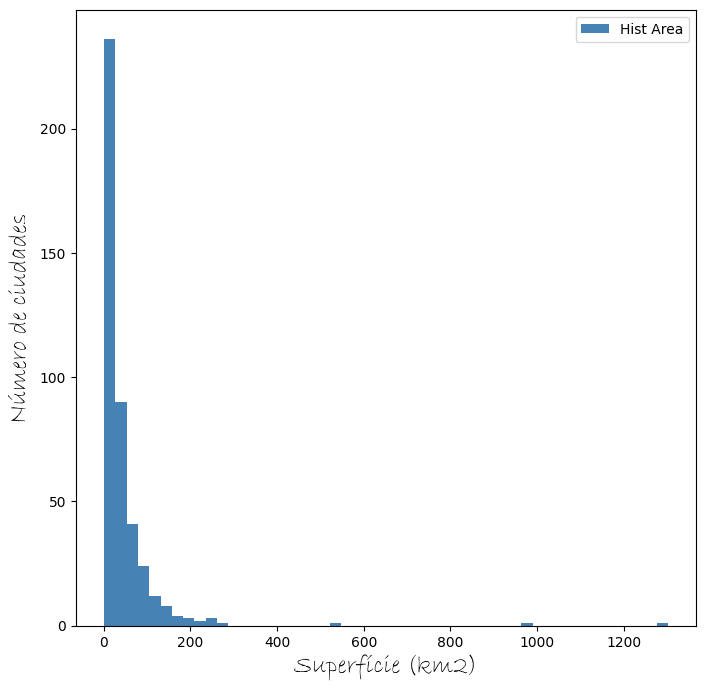

In [185]:
fig,ax = plt.subplots(figsize= (8,8))
kwargs = dict(bins = 50, color= "steelblue" )

ax.hist(df_cities.area_total_km2, **kwargs, label= "Hist Area")
ax.legend()

font_dict = {
    "family":"Bradley Hand itc",
    "size": "18"
}
ax.set_ylabel("Número de ciudades", fontdict= font_dict)
ax.set_xlabel("Superfície (km2)", fontdict= font_dict);

    3. El scatter de área de agua de un ciudad con su poblacion.

Text(60, 3500000, 'Outliers')

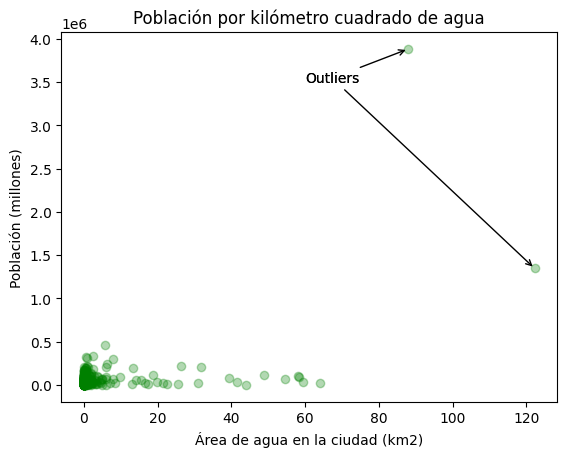

In [186]:
# Esta vez lo hago con plt.<funcion> en lugar de usar el objeto axes:

plt.scatter(df_cities.area_water_km2, df_cities.population_total, c = "green", alpha= 0.3)
plt.xlabel("Área de agua en la ciudad (km2)")
plt.ylabel("Población (millones)")
plt.title("Población por kilómetro cuadrado de agua")


# Para encontrar las coordenadas de los outliers, busco el valor max de cada variable y su índice; 
# luego hago accessing con ese índice para encontrar su correspondiente en la otra variable:

# Variable X / Área agua ciudad:
x_agua = df_cities.area_water_km2.max()
idx_max_agua = df_cities.area_water_km2.idxmax()
y_agua = df_cities.population_total[idx_max_agua]  # para encontrar su correspondiente en 'y' aplico el mismo índice que hemos encontrado con el idxmax

# Variable Y / Habitantes:
y_population = df_cities.population_total.max()
idx_max_population = df_cities.population_total.idxmax()
x_population = df_cities.area_water_km2[idx_max_population]

props = {
    "arrowstyle": "->",
    "connectionstyle":"Arc3"
}

plt.annotate("Outliers", xy= (x_agua, y_agua), xytext= (60, 3500000),
             arrowprops= props)
plt.annotate("Outliers", xy= (x_population, y_population), xytext= (60, 3500000),
             arrowprops= props)

In [187]:
# ***ESTE CÓDIGO Y SUS COMPROBACIONES LO HE HECHO APARTE PARA BUSCAR LAS COORDENADAS DE LOS OUTLIERS Y YA LO HE MOVIDO A LA CELDA ANTERIOR JUNTO CON EL SCATTER***

# Para encontrar las coordenadas de los outliers, busco el valor max de cada variable y su índice correspondiente:
x = df_cities.area_water_km2.max()
idx_max_area = df_cities.area_water_km2.idxmax()
y = df_cities.population_total[idx_max_area]  # para encontrar su correspondiente en 'y' aplico el mismo índice que hemos encontrado con el idxmax


# Lo imprimimos en pantalla para comprobar los datos y nos subimos el código de las variables a la celda anterior.
print("Coordenadas Outlier valor max Área Agua:")
print(f"Coordenada X: {x}")
print(f"Índice X: {idx_max_area}")
print(f"Coordenada Y: {y}")
print("\n")

y_population = df_cities.population_total.max()
idx_max_population = df_cities.population_total.idxmax()
x_population = df_cities.area_water_km2[idx_max_population]  

print("Coordenadas Outlier valor max Habitantes:")
print(f"Coordenada Y: {y_population}")
print(f"Índice Y: {idx_max_population}")
print(f"Coordenada X: {x_population}")


Coordenadas Outlier valor max Área Agua:
Coordenada X: 122.27
Índice X: 367
Coordenada Y: 1345895


Coordenadas Outlier valor max Habitantes:
Coordenada Y: 3884307
Índice Y: 239
Coordenada X: 88.0


In [188]:
# **MÁS COMPROBACIONES DE QUE LOS DATOS SON CORRECTOS**

# df_cities["population_total"].max()   --> esto me devuelve 3884307
mask = df_cities["population_total"] == 3884307
df_cities[mask]

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
239,239,LosAngeles,34.05,-118.25,71.0,2.0,3884307,503.0,469.0,34.0,1302.0,1214.0,88.0,6.7


In [189]:
# df_cities.area_water_km2.max()   --> esto me devuelve 122.270
mask = df_cities.area_water_km2 == 122.270
df_cities[mask].population_total

367    1345895
Name: population_total, dtype: int64

    4. El boxplot de la altura de las ciudades.

Text(0.5, 0, 'Altitud (m)')

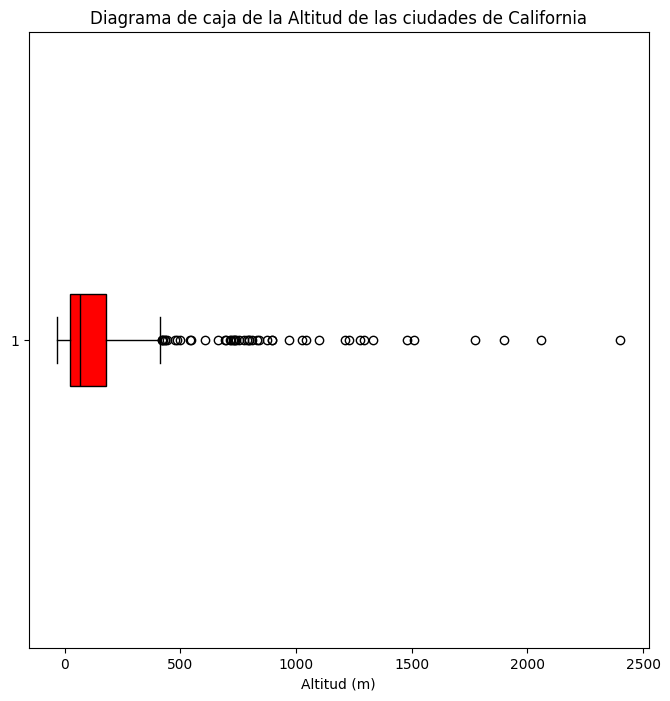

In [190]:
plt.figure(figsize = (8,8))

# patch artist= True que la caja aparezca con relleno, cambiamos el color con el argumento bonxprops (dict con 'facecolor')
props = {
    "facecolor":"red"

# para customizar la línea del percentil 50% usaremos el argumento medianprops, pues la línea aparece en rojo por defecto
}
medianprops = {
    "color":"black"
}
plt.boxplot(df_cities.elevation_m, whis=1.5,vert= False, patch_artist=True, boxprops= props, medianprops= medianprops)
plt.title("Diagrama de caja de la Altitud de las ciudades de California")
plt.xlabel("Altitud (m)")

    1.5. JUNTAMOS LOS 4 AXES EN UNA SOLA FIGURA:



Text(0.5, 0, 'Altitud (m)')

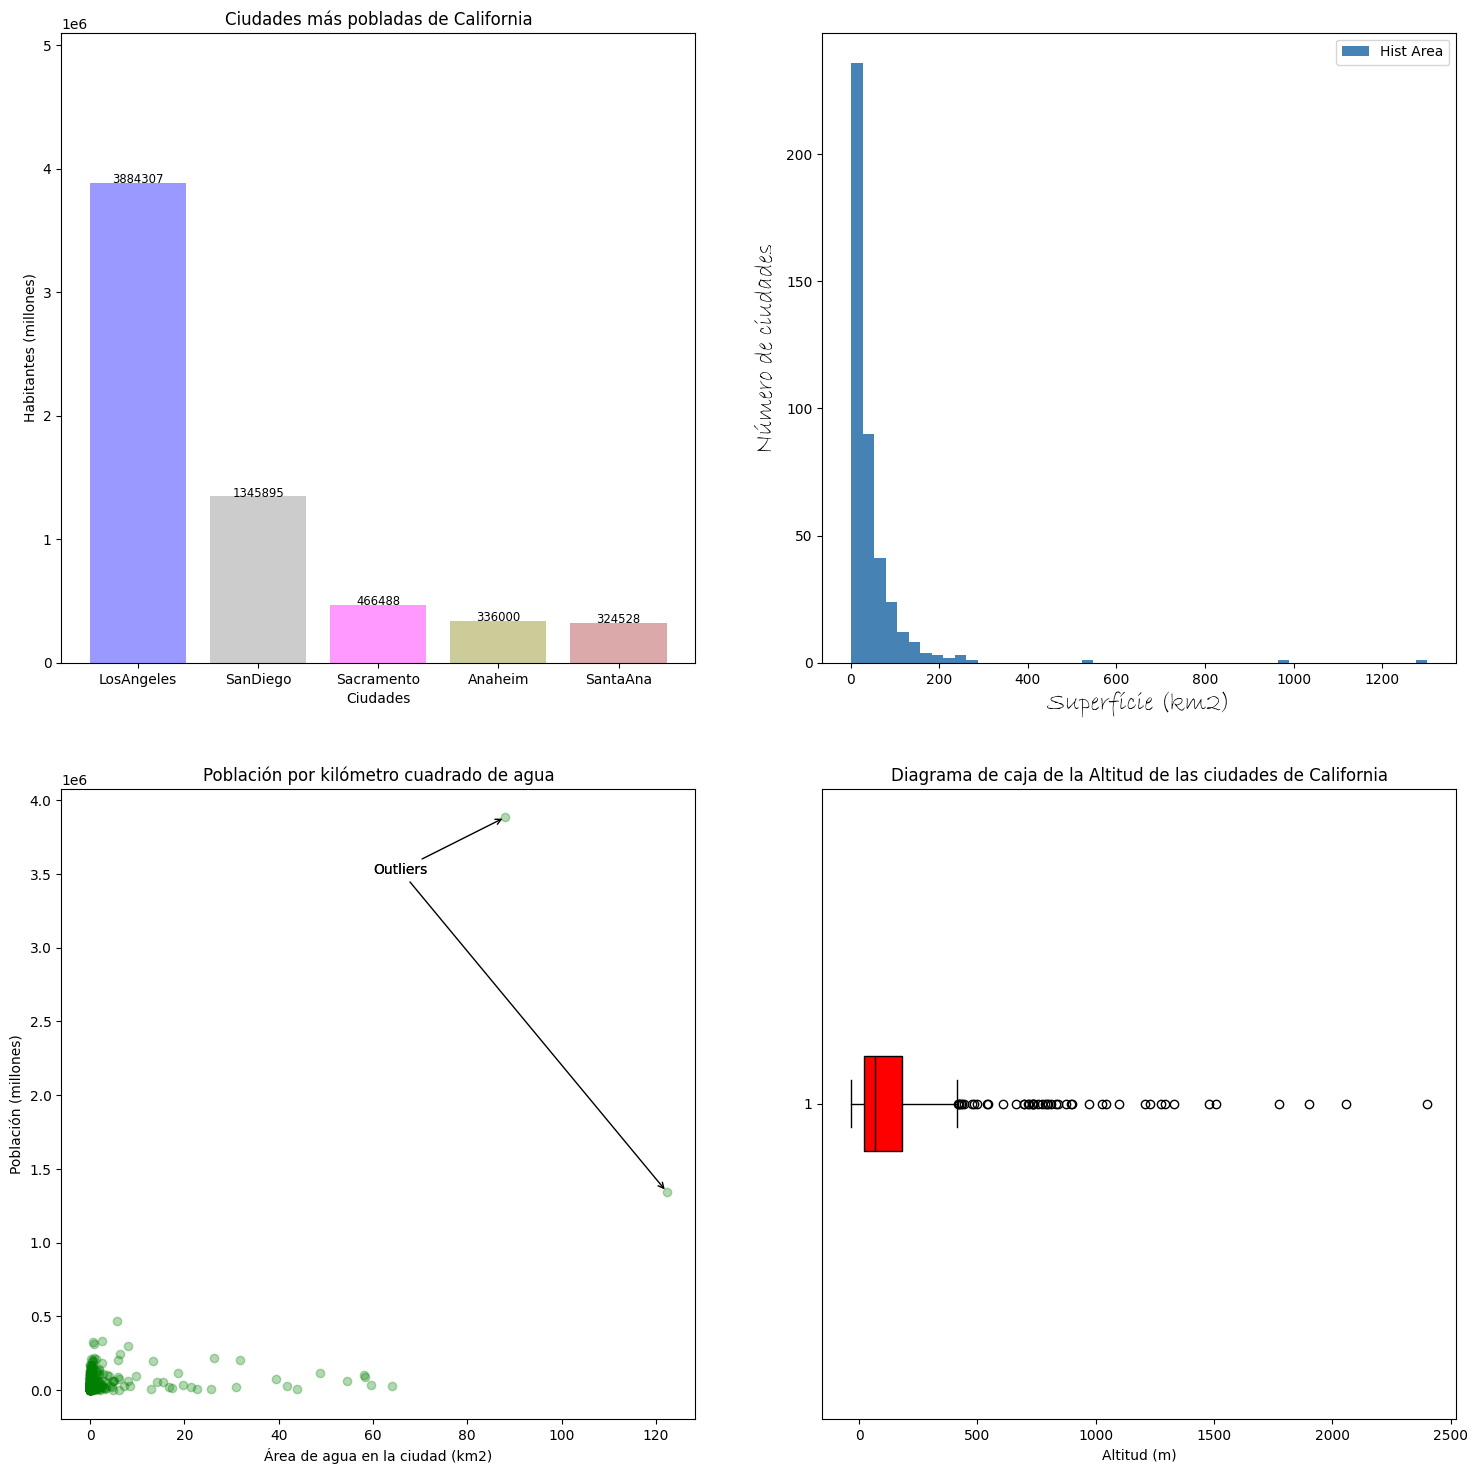

In [191]:
fig, ax = plt.subplots(2,2, figsize=(18,18))     # necesitamos una matriz de 2x2

# Nos traemos el código de cada gráfico y le añadimos el indexado:

# AX [0,0] --> DIAGRAMA DE BARRAS

categorias = df_top_5.city.value_counts().index.to_list()           
frecuencia = df_top_5["population_total"].to_list()                

ax[0,0].bar(categorias, frecuencia ,color = ["blue","gray","magenta","olive","brown"], alpha= 0.4)
ax[0,0].set_ylim(0,51e5)
ax[0,0].set_title("Ciudades más pobladas de California")
ax[0,0].set_xlabel("Ciudades")
ax[0,0].set_ylabel("Habitantes (millones)")  

for i in range (5):
    ax[0,0].text(categorias[i],frecuencia[i],f"{frecuencia[i]}", ha = "center", fontsize= "small")


# AX [0,1] --> HISTOGRAMA

kwargs = dict(bins = 50, color= "steelblue" )

ax[0,1].hist(df_cities.area_total_km2, **kwargs, label= "Hist Area")
ax[0,1].legend()

font_dict = {
    "family":"Bradley Hand itc",
    "size": "18"
}
ax[0,1].set_ylabel("Número de ciudades", fontdict= font_dict)
ax[0,1].set_xlabel("Superfície (km2)", fontdict= font_dict);


# AX [1,0] --> SCATTER o GRÁFICO DE DISPERSIÓN

ax[1,0].scatter(df_cities.area_water_km2, df_cities.population_total, c = "green", alpha= 0.3)
ax[1,0].set_xlabel("Área de agua en la ciudad (km2)")
ax[1,0].set_ylabel("Población (millones)")
ax[1,0].set_title("Población por kilómetro cuadrado de agua")

# Variable X / Área agua ciudad:
x_agua = df_cities.area_water_km2.max()
idx_max_agua = df_cities.area_water_km2.idxmax()
y_agua = df_cities.population_total[idx_max_agua]  

# Variable Y / Habitantes:
y_population = df_cities.population_total.max()
idx_max_population = df_cities.population_total.idxmax()
x_population = df_cities.area_water_km2[idx_max_population]

props = {
    "arrowstyle": "->",
    "connectionstyle":"Arc3"
}

ax[1,0].annotate("Outliers", xy= (x_agua, y_agua), xytext= (60, 3500000),
             arrowprops= props)
ax[1,0].annotate("Outliers", xy= (x_population, y_population), xytext= (60, 3500000),
             arrowprops= props)


# AX [1,1] --> DIAGRAMA DE CAJAS o BOXPLOT

props = {
    "facecolor":"red"
}

medianprops = {
    "color":"black"
}

ax[1,1].boxplot(df_cities.elevation_m, whis=1.5,vert= False, patch_artist=True, boxprops= props, medianprops= medianprops)
ax[1,1].set_title("Diagrama de caja de la Altitud de las ciudades de California")
ax[1,1].set_xlabel("Altitud (m)")

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

In [192]:
fig.savefig("./figura_ciudades_california")